In [1]:
from utils.DataUtils import DataUtils
from utils.SignalPreProcessing import normalize
import numpy as np

In [2]:
data = ['adbecg', 'nifecg', 'synt_ecg']
data_utils = DataUtils()

# # ADBECG
adbecg = data_utils.get_data(dataset='adbecg')
# # # NIFECG
nifecg = data_utils.get_data(dataset='nifecg')
# # SYNT_ECG
synt_ecg = data_utils.get_data(dataset='synt_ecg')



In [3]:
fs = 1000  # 1000Hz sampling frequency
segment_size = int(0.25 * fs)  # 250ms segment size
overlap_size = int(0.01 * fs)  # 10ms overlap size
# window = signal.get_window('hamming', segment_size)  # Hamming window
time_axis = np.arange(0, segment_size) / fs


for record in adbecg:
  record_signal = data_utils.open_record(record)
  for chn in range(0, len(record_signal.getSampleFrequencies())):
    # print('Reading channel: {}'.format(record_signal.getSignalLabels()[chn]))
    _signal = normalize(record_signal.readSignal(chn))
    
    segments = []
    segments_index = 0
    for i in range(0, len(_signal) - segment_size, segment_size - overlap_size):
      segments.append(_signal[i:i+segment_size])
    
    

Reading edf file: ../data\adbecg\r01.edf
Reading edf file: ../data\adbecg\r04.edf
Reading edf file: ../data\adbecg\r07.edf
Reading edf file: ../data\adbecg\r08.edf
Reading edf file: ../data\adbecg\r10.edf


In [4]:

def mean(signal):
    return np.mean(signal)

def std(signal):
    return np.std(signal)

In [5]:
mean_std = []
for i in range(0, 250):
  current_seg = [arr[i] for arr in segments]
  mean_std.append((mean(current_seg), std(current_seg)))



In [6]:
from random import seed, randint, uniform

_seed = randint(0, 10000)
seed(_seed)

random_noise = [uniform(-0.1, 0.1) for i in range(0, 250)]

def generate_signal(x_arr, mean_std):
  signal = []
  for i in range(0, 250):
    signal.append(mean_std[i][0])
  return signal

signal = generate_signal(random_noise, mean_std)


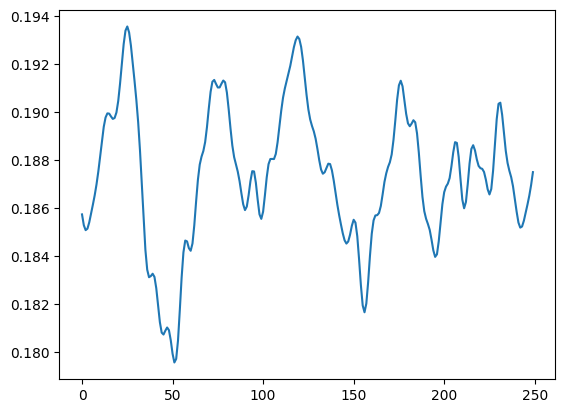

In [7]:
from matplotlib import pyplot as plt

plt.plot(signal)
plt.show()